<a href="https://colab.research.google.com/github/AarnoStormborn/Python-opencv-DeepLearning-for-CV/blob/main/CV04_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection



## Template Matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
full = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

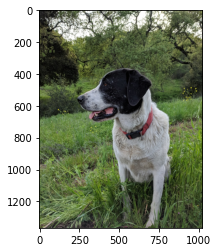

In [ ]:
plt.imshow(full)

In [ ]:
face = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

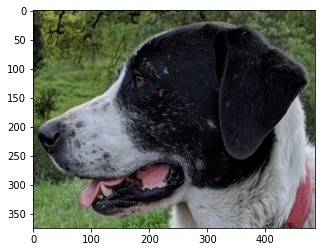

In [ ]:
plt.imshow(face)

In [ ]:
# Template matching methods in OpenCV (will be used using 'eval' function)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

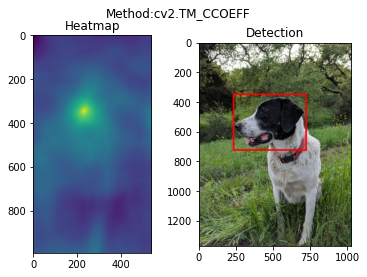

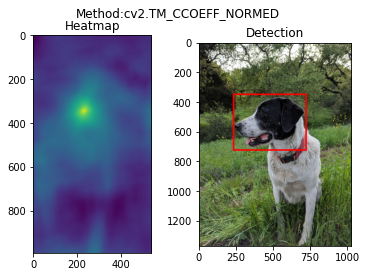

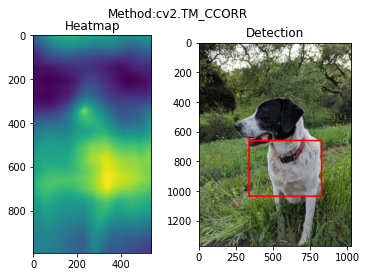

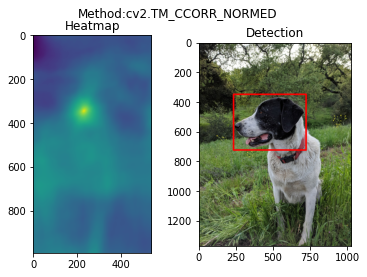

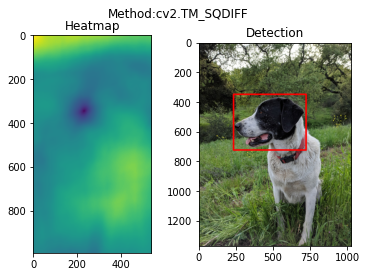

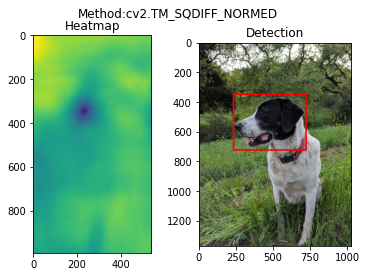

In [ ]:
for m in methods:

    full_copy = full.copy()
    method = eval(m)
    result = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)

    plt.subplot(121)
    plt.imshow(result)
    plt.title('Heatmap')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection')

    plt.suptitle(f'Method:{m}')

    plt.show()

## Corner Detection

### Harris Corner Detection

In [ ]:
flat_chess = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

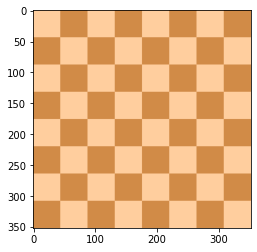

In [ ]:
plt.imshow(flat_chess)

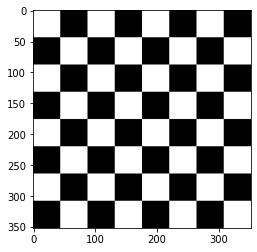

In [ ]:
gray_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_chess, cmap='gray')

In [ ]:
real_chess = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

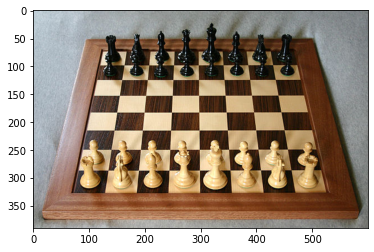

In [ ]:
plt.imshow(real_chess)

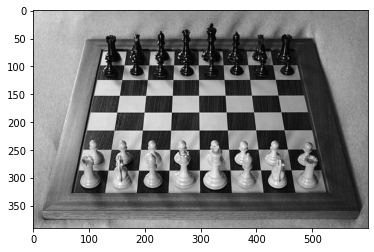

In [ ]:
gray_real = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real, cmap='gray')

In [ ]:
gray = np.float32(gray_chess)

In [ ]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [ ]:
dst = cv2.dilate(dst, None)

In [ ]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

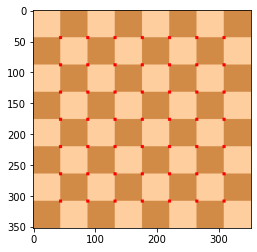

In [ ]:
plt.imshow(flat_chess)

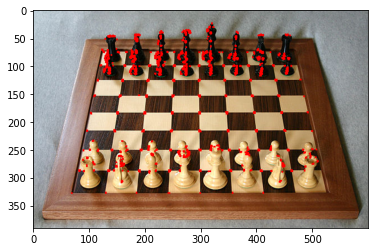

In [ ]:
gray = np.float32(gray_real)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

### Shi-Tomasi Corner Detection

In [ ]:
flat_chess = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

real_chess = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_chess, 0, 0.01, 10) # set zero to get all corners

In [ ]:
corners = np.int0(corners)

In [ ]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

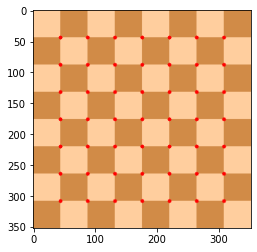

In [ ]:
plt.imshow(flat_chess)

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_real, 64, 0.01, 10) # set zero to get all corners

In [ ]:
corners = np.int0(corners)

In [ ]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

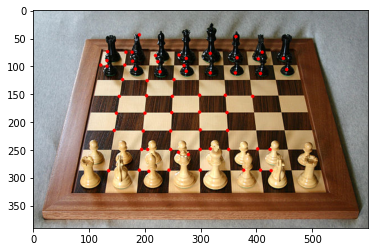

In [ ]:
plt.imshow(real_chess)

## Edge Detection

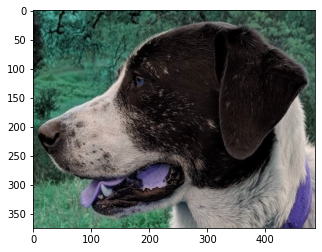

In [ ]:
img = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/sammy_face.jpg')
plt.imshow(img)

In [ ]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

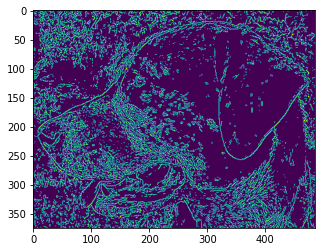

In [ ]:
plt.imshow(edges)

In [ ]:
med_val = np.median(img)
med_val

64.0

In [ ]:
lower = int(max(0, 0.7*med_val)) # lower will be either 0 or 70 percent of median
upper = int(min(255, 1.3*med_val)) # upper will be either 255 or 130 percent of median

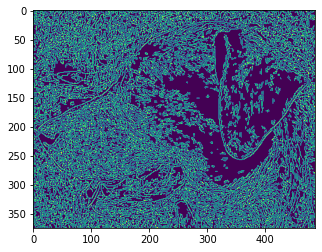

In [ ]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

In [ ]:
blurred = cv2.blur(img, ksize=(5,5))

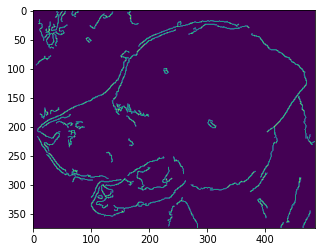

In [ ]:
edges = cv2.Canny(image=blurred, threshold1=lower, threshold2=upper+100)
plt.imshow(edges)

## Grid Detection

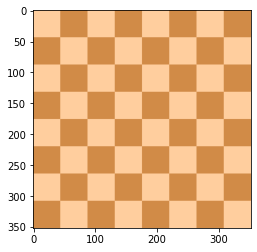

In [ ]:
flat_chess = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

In [ ]:
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))
found

True

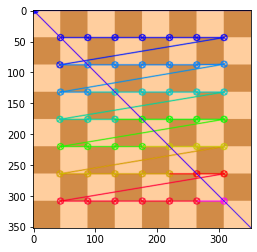

In [ ]:
cv2.drawChessboardCorners(flat_chess, (8,8), corners, found)
plt.imshow(flat_chess)

## Contour Detection

In [ ]:
img = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/internal_external.png', 0)
img.shape

(652, 1080)

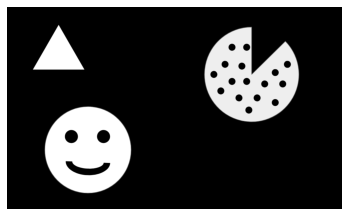

In [ ]:
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
type(contours), len(contours)

(tuple, 22)

In [ ]:
type(hierarchy), hierarchy

(numpy.ndarray, array([[[ 4, -1,  1, -1],
         [ 2, -1, -1,  0],
         [ 3,  1, -1,  0],
         [-1,  2, -1,  0],
         [21,  0,  5, -1],
         [ 6, -1, -1,  4],
         [ 7,  5, -1,  4],
         [ 8,  6, -1,  4],
         [ 9,  7, -1,  4],
         [10,  8, -1,  4],
         [11,  9, -1,  4],
         [12, 10, -1,  4],
         [13, 11, -1,  4],
         [14, 12, -1,  4],
         [15, 13, -1,  4],
         [16, 14, -1,  4],
         [17, 15, -1,  4],
         [18, 16, -1,  4],
         [19, 17, -1,  4],
         [20, 18, -1,  4],
         [-1, 19, -1,  4],
         [-1,  4, -1, -1]]], dtype=int32))

In [ ]:
external = np.zeros(img.shape)

In [ ]:
for i in range(len(contours)):

    # external
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external, contours,i,255,-1)

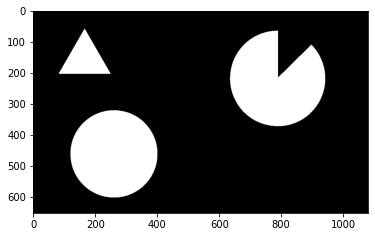

In [ ]:
plt.imshow(external, cmap='gray')

In [ ]:
internal = np.zeros(img.shape)

In [ ]:
for i in range(len(contours)):

    # internal
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal, contours,i,255,-1)

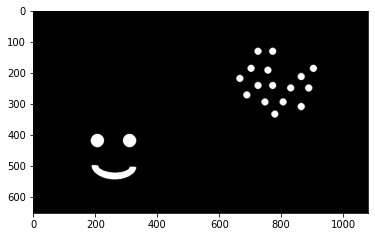

In [ ]:
plt.imshow(internal, cmap='gray')

## Feature Matching

### ORB - Brute Force Matching

In [4]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

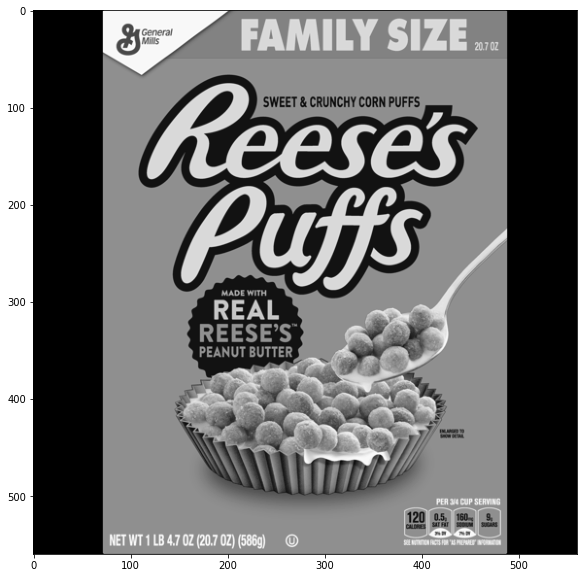

In [ ]:
reeses = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
display(reeses)

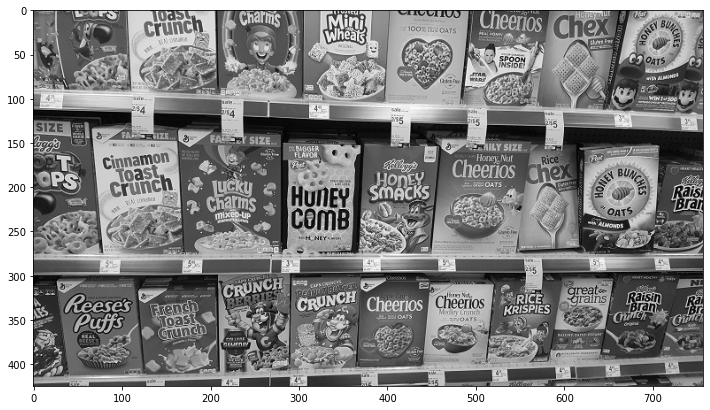

In [ ]:
cereals = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display(cereals)

In [ ]:
orb = cv2.ORB_create()

In [ ]:
key1, des1 = orb.detectAndCompute(reeses, None)
key2, des2 = orb.detectAndCompute(cereals, None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
matches = bf.match(des1, des2)

In [ ]:
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
reeses_matches = cv2.drawMatches(reeses, key1, cereals, key2, matches[:25], None, flags=2)

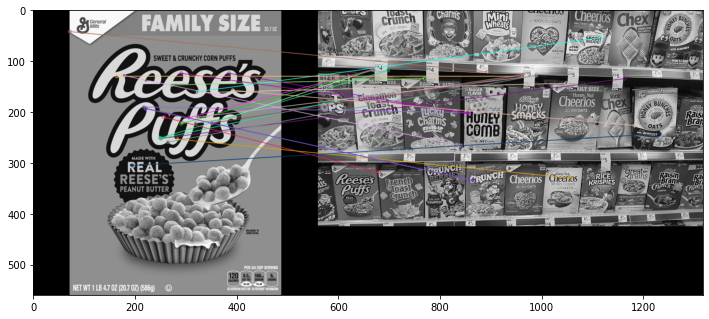

In [ ]:
display(reeses_matches)

### Scale Invariant Feature Transform - Brute Force Matching

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
key1, des1 = sift.detectAndCompute(reeses, None)
key2, des2 = sift.detectAndCompute(cereals, None)

In [ ]:
bf = cv2.BFMatcher()

In [ ]:
matches = bf.knnMatch(des1, des2, k=2)

In [ ]:
matches[0]

(< cv2.DMatch 0x7f082d7ff030>, < cv2.DMatch 0x7f082d7ffdd0>)

In [ ]:
good_matches = []

for m1, m2 in matches:
    # Ratio Test
    if m1.distance < 0.75*m2.distance:
        good_matches.append([m1])

In [ ]:
len(good_matches), len(matches)

(79, 1501)

In [ ]:
sift_matches = cv2.drawMatchesKnn(reeses, key1, cereals, key2, good_matches, None, flags=2)

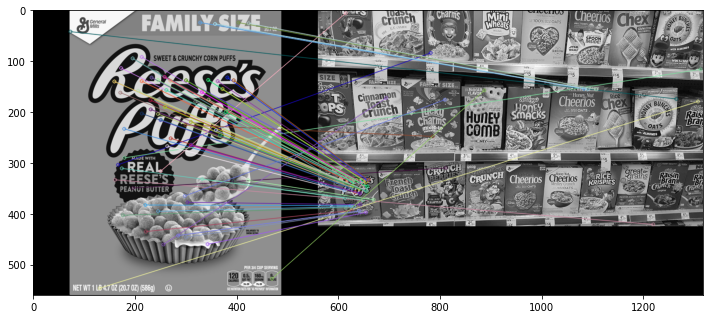

In [ ]:
display(sift_matches)

### Fast Library for Approximate Nearest Neighbours (FLANN)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
key1, des1 = sift.detectAndCompute(reeses, None)
key2, des2 = sift.detectAndCompute(cereals, None)

In [ ]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [ ]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [ ]:
matches = flann.knnMatch(des1, des2, k=2)

In [ ]:
good_matches = []

for m1, m2 in matches:
    # Ratio Test
    if m1.distance < 0.7*m2.distance:
        good_matches.append([m1])

In [ ]:
flann_matches = cv2.drawMatchesKnn(reeses, key1, cereals, key2, good_matches, None, flags=2)

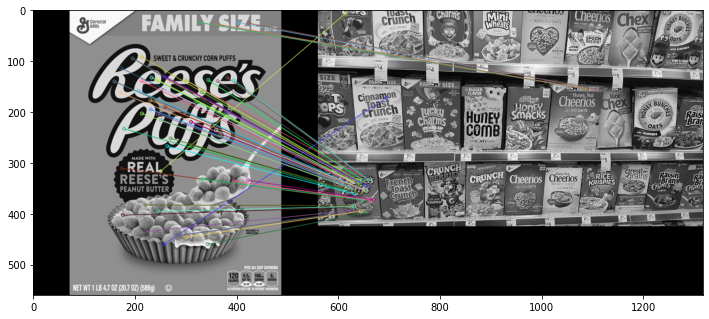

In [ ]:
display(flann_matches)

## Watershed Algorithm

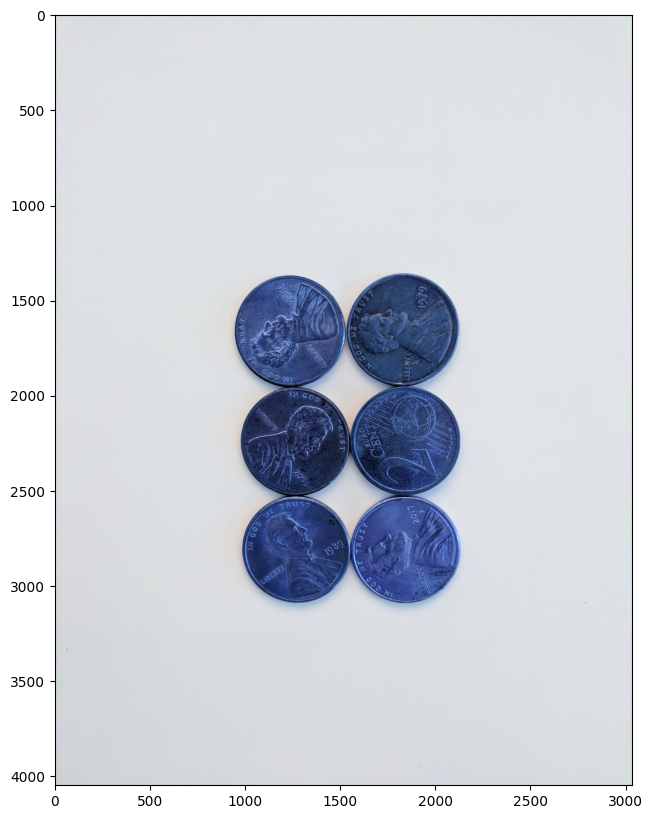

In [18]:
img = cv2.imread('/content/drive/MyDrive/udemy/Computer-Vision-with-Python/DATA/pennies.jpg')
display(img)

Steps involved:
* Median Blur
* Grayscale
* Binary Threshold
* Find contours

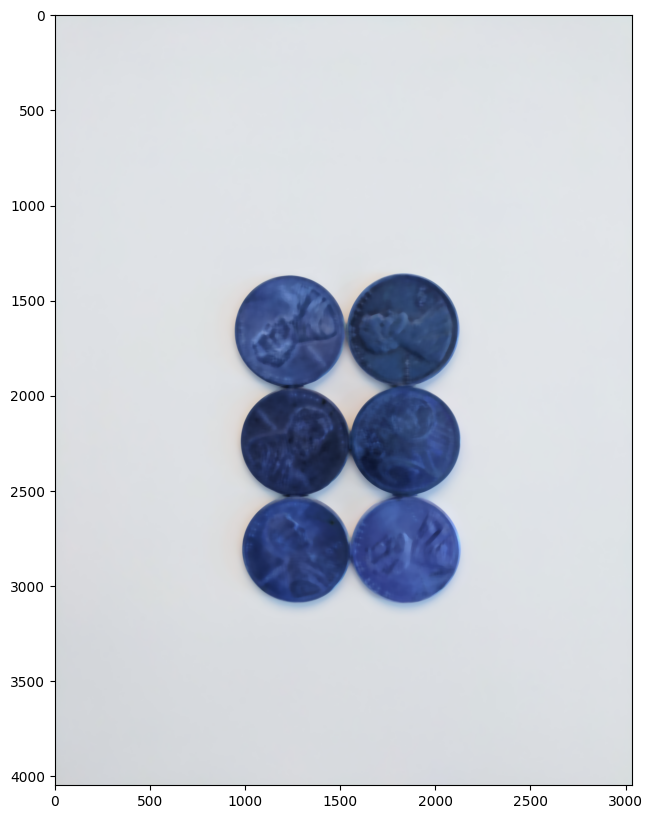

In [19]:
blur = cv2.medianBlur(img, 25)
display(blur)

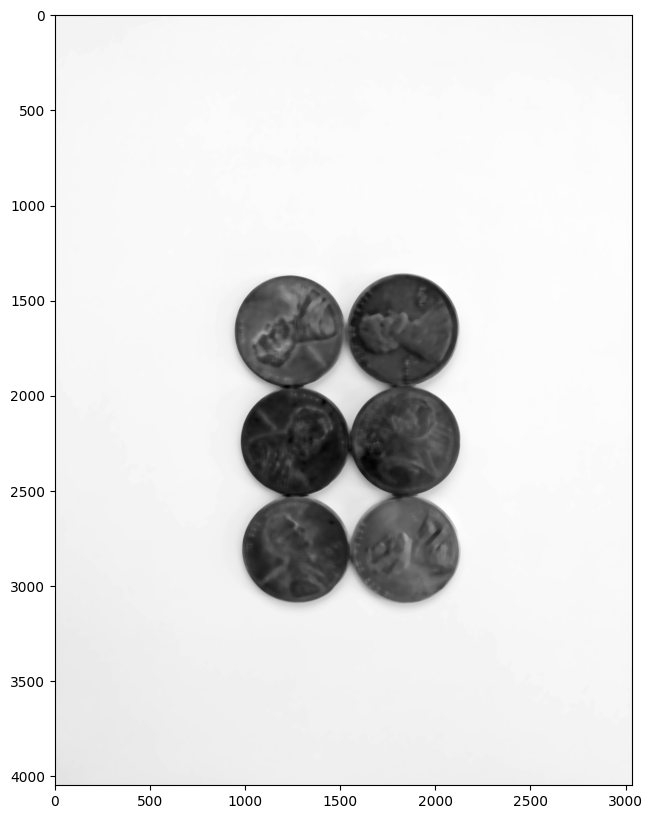

In [20]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
display(gray)

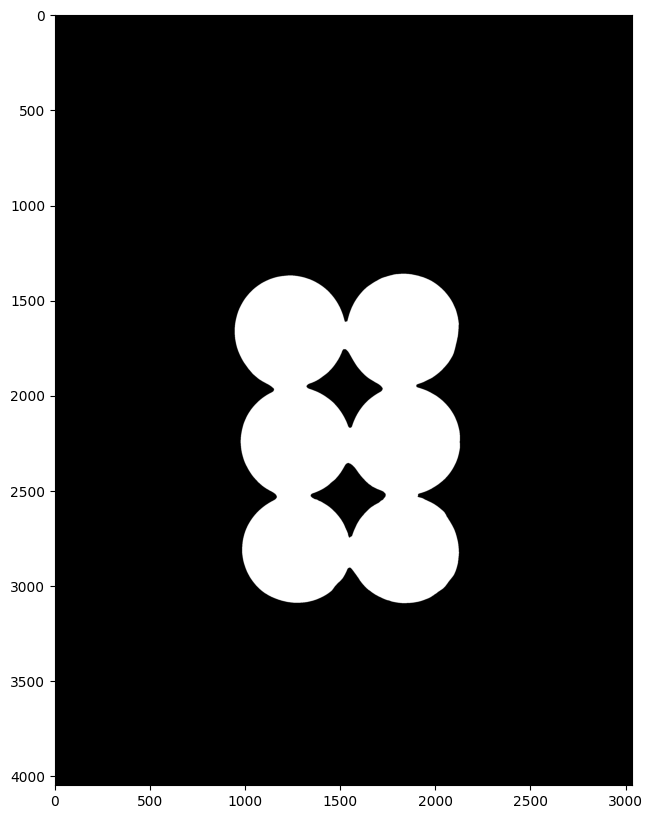

In [27]:
ret, thresh = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)
display(thresh)

In [28]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255,0,0),10)

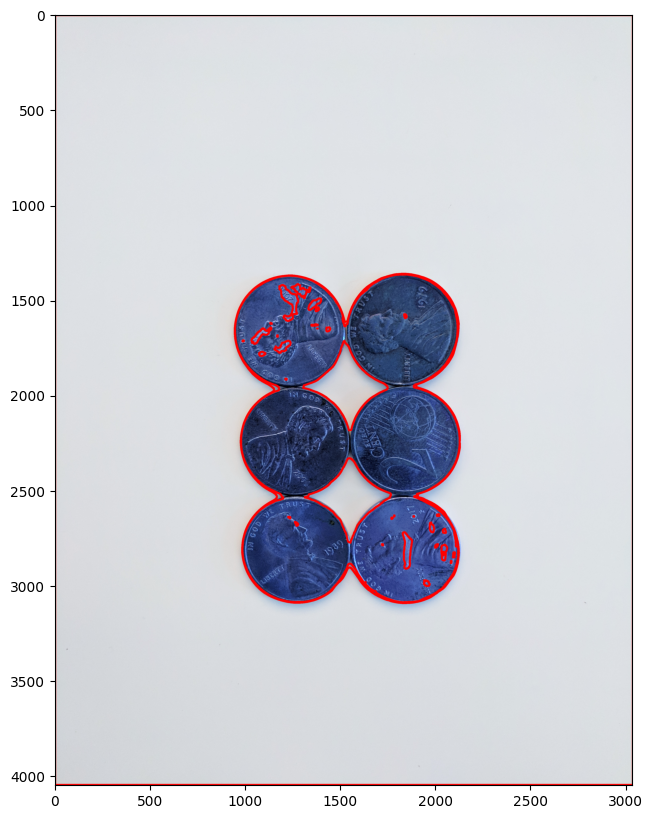

In [29]:
display(img)